In [1]:
import numpy as np
from PIL import Image
import os


In [2]:
trainN = 2400
testN = 200
curr = 1
currClass = 0
xTrain = []
xTest = []
yTrain = []
yTest = []

# convert Train images to 1D arrays and store them in xTrain
# create the corresponding classes
while(curr <= trainN):
    img = Image.open(os.path.join(os.getcwd(), 'Data\Train', f'{curr}.jpg'))
    arr = np.array(img)
    flatarr = arr.ravel()
    xTrain.append(flatarr)
    yTrain.append(currClass)
    curr+=1
    if curr % 240 == 1:
        currClass+=1

curr = 1
currClass = 0

# convert test images to 1D arrays and store them in xTest
# create the corresponding classes in tests
while(curr <= testN):
    img = Image.open(os.path.join(os.getcwd(), 'Data\Test', f'{curr}.jpg'))
    arr = np.array(img)
    flatarr = arr.ravel()
    xTest.append(flatarr)
    yTest.append(currClass)
    curr+=1
    if curr%20==1:
        currClass+=1



In [3]:
xTelda = xTrain.copy()
curr = 0

# add 1 to the end of each image vector to be able to multiply with w0
while(curr < trainN):
    xTelda[curr] = np.append(xTelda[curr], 1)
    curr+=1
xTelda = np.array(xTelda)

In [4]:
curr = 0
currClass = 0
weights = []

# equation: inverse(XTT.XT).XTT
xTeldaTranspose = xTelda.transpose()
xTeldaTranspose = np.array(xTeldaTranspose)
multip = np.matmul(xTeldaTranspose, xTelda)
inverse = np.linalg.pinv(multip)
multip2 = np.matmul(inverse, xTeldaTranspose)

while currClass <= 9:
    # use One vs all that's mean we make the target of the current class only 1 and the rest is -1 ie.(isZero, isNotZero)
    yCurrTrain = []
    # convert to binary classification
    curr = 0
    while(curr < trainN):
        if yTrain[curr] == currClass:
            yCurrTrain.append(1)
        else:
            yCurrTrain.append(-1)
        curr+=1
    weightTelda = np.matmul(multip2, yCurrTrain)
    weights.append(weightTelda)
    currClass+=1


In [5]:
yCurrTrain == yTrain

False

In [6]:
weights[1]

array([-1.04062050e-02, -1.27681691e-02, -1.41128185e-02,  1.13355533e-02,
       -1.77001186e-02,  3.30445834e-02,  1.01965582e-02,  6.01108270e-03,
       -8.05442355e-03, -3.34459218e-03,  2.18288798e-03, -7.41776421e-04,
        1.92255977e-03,  1.68904304e-04, -2.46185263e-03,  1.66288314e-03,
       -1.50613662e-03,  2.90973878e-03, -4.70442465e-04,  5.11961255e-05,
       -4.75476990e-03, -3.83316287e-03, -8.22869465e-04, -1.99963918e-03,
       -2.26480507e-03, -7.21816156e-03,  1.35913320e-02,  3.83749153e-03,
       -3.27218792e-03, -2.42577522e-02,  3.11063748e-03, -1.28570957e-04,
       -1.01906768e-02, -4.57351261e-03, -9.03043925e-03,  2.98203126e-02,
       -7.37223726e-03, -5.21201540e-03,  3.19679797e-03, -2.76826035e-03,
        2.82483997e-04,  1.21955872e-03, -2.19159941e-04,  1.45270043e-03,
        2.78405318e-04,  1.16172930e-04,  5.18048833e-04, -3.03227189e-03,
        1.17863104e-03,  1.04370505e-03,  1.00317372e-03,  1.42794102e-03,
       -6.07875828e-03, -

In [7]:
# testing
confusionMatrix = np.zeros((10,10))
xTeldaTest = xTest.copy()
curr = 0

while(curr < testN):
    xTeldaTest[curr] = np.append(xTeldaTest[curr], 1)
    mxV = -10000
    mxClass = 0
    actualClass = yTest[curr]
    for currClass in range(10):
        currClassV = np.dot(xTeldaTest[curr].transpose(), weights[currClass])
        print(curr, currClass, actualClass, currClassV)
        if mxV < currClassV:
            mxV = currClassV
            mxClass = currClass

    confusionMatrix[actualClass][mxClass] += 1

    curr+=1
print(confusionMatrix)


0 0 0 0.28438874495940525
0 1 0 -1.4882747844085649
0 2 0 -1.447083465418196
0 3 0 -0.8266217899104049
0 4 0 -0.17804844212232873
0 5 0 -1.415135018216279
0 6 0 -0.6981844358389783
0 7 0 -0.8047817007094111
0 8 0 -0.8235090757037014
0 9 0 -0.6027500326075768
1 0 0 0.3246921299963633
1 1 0 -1.0366195844258574
1 2 0 -0.459583138427911
1 3 0 -1.0816305677072537
1 4 0 -0.835656501362667
1 5 0 -0.6840104809040788
1 6 0 -1.2961970732728951
1 7 0 -0.9594727633661433
1 8 0 -0.56941885476374
1 9 0 -1.4021031657789587
2 0 0 0.9009367876413791
2 1 0 -0.7205354006555846
2 2 0 -1.0825500218417905
2 3 0 -1.5352854784036136
2 4 0 -0.9295187104974793
2 5 0 -1.0269358756407918
2 6 0 -0.8962901275258616
2 7 0 -1.0567426603569237
2 8 0 -0.8869927636466883
2 9 0 -0.766085749058736
3 0 0 0.4888912784533205
3 1 0 -0.693539965262955
3 2 0 -1.1786217282645
3 3 0 -1.1818465865807648
3 4 0 -0.6485935367930874
3 5 0 -0.8981312469623948
3 6 0 -0.406381412452603
3 7 0 -1.0446814108491782
3 8 0 -1.3501251781280237


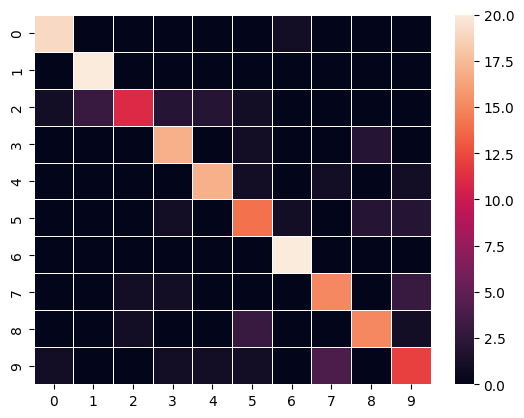

In [8]:
# plot confusion-matrix heatmap
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.heatmap(confusionMatrix, linewidth=0.5)
plt.show()